In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Generate dataset


In [6]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

# Linear regression model

In [10]:
from tensorflow.keras.models import Sequential

# define model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# compile the model
model.compile(optimizer='sgd', 
                loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.39, b: 0.00


# Train

In [14]:
model.fit(trX, 
        trY, 
        epochs=100, 
        batch_size=32)

Epoch 1/100
4/4 [==============================] - 0s 997us/step - loss: 0.1103
Epoch 2/100
4/4 [==============================] - 0s 998us/step - loss: 0.1104
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.1104
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.1104
Epoch 5/100
4/4 [==============================] - 0s 998us/step - loss: 0.1104
Epoch 6/100
4/4 [==============================] - 0s 992us/step - loss: 0.1104
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.1104
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.1104
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.1103
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 13/100
4/4 [=========================

# Print trained weights

In [15]:

weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 2.01, b: -0.01


<AxesSubplot:>

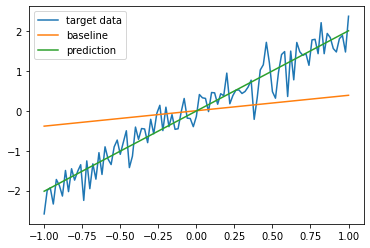

In [19]:
sns.lineplot(x = trX, 
             y = trY,
             label = "target data")

sns.lineplot(x = trX, 
             y = w_init*trX + b_init,
             label = "baseline")

sns.lineplot(x = trX, 
             y = w*trX + b,
             label = "prediction")

# More layers

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0.01, 
                                                  patience=5)

# define model
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(2, activation='relu'))

# compile the model
model.compile(optimizer='adam', 
                loss='mse')

model.fit(trX, 
        trY, 
        epochs=100, 
        batch_size=32,
        validation_split=0.3,
        callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 0s 51ms/step - loss: 1.4512 - val_loss: 2.1616
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 1.4342 - val_loss: 2.1616
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 1.4185 - val_loss: 2.1616
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 1.4026 - val_loss: 2.1616
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 1.3866 - val_loss: 2.1616
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 1.3719 - val_loss: 2.1616


Linear regression model is trained with weight w: -0.75, b: 0.02


<AxesSubplot:>

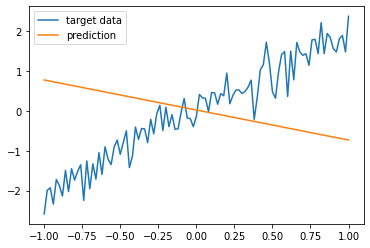

In [29]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

sns.lineplot(x = trX, 
             y = trY,
             label = "target data")

sns.lineplot(x = trX, 
             y = w*trX + b,
             label = "prediction")